In [1]:
%load_ext autoreload
%autoreload 2
import cascade as cas
import flow
import pool
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from copy import deepcopy
import scipy as sp
import bottleneck as bt
from scipy.stats import pearsonr
from scipy.cluster import hierarchy

# except: 
import tensortools as tt
from flow.misc import wordhash
from cascade import utils
from cascade import paths
from cascade import tca
from functools import reduce

In [65]:
mice = ['OA27', 'VF226', 'OA67','OA32', 'OA34', 'OA36', 'OA26']
words = ['bookmarks']
words.extend(['horrible']*6)

# load in a full size tensor
model_list = []
tensor_list = []
id_list = []
bhv_list = []
meta_list = []
for mouse, word in zip(mice, words):
    out = cas.load.load_all_groupday(mouse, word=word, with_model=True, group_by='all3', nan_thresh=0.95)  # return   model, ids, tensor, meta, bhv
    model_list.append(out[0])
    tensor_list.append(out[2])
    id_list.append(out[1])
    bhv_list.append(out[4])
    meta_list.append(cas.utils.add_10stages_to_meta(out[3], simple=False))

Updated naive cs-ori pairings to match learning.
     270 plus
     135 minus
     0 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     0 plus
     270 minus
     135 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     0 plus
     270 minus
     135 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     135 plus
     0 minus
     270 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     270 plus
     135 minus
     0 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     0 plus
     270 minus
     135 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     270 plus
     135 minus
     0 neutral
Updated naive trialerror to match learning.


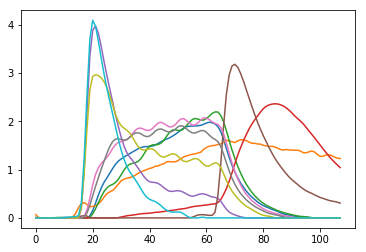

In [10]:
plt.plot(model_list[0].results[10][0].factors[1])

In [15]:
pop_model.shape

(8669, 1)

In [53]:
# test_rank = 10
m_num = 2
annot_mat = np.zeros((20,20))
annot_mat[:] = np.nan
corr_mat = np.zeros((20,20))
corr_mat[:] = np.nan
p_mat = np.zeros((20,20))
p_mat[:] = np.nan

pop_model = model_list[m_num].results[1][0].factors[2][:, :].flatten()
for test_rank in range(1, 21):
    for i in range(test_rank):
        fac_n = model_list[m_num].results[test_rank][0].factors[2][:, i].flatten()
        r, p = pearsonr(pop_model, fac_n)
        corr_mat[test_rank-1, i] = r
        p_mat[test_rank-1, i] = p
    annot_mat[test_rank-1, :] = np.argsort(corr_mat[test_rank-1, :])+1
    corr_mat[test_rank-1, :] = np.sort(corr_mat[test_rank-1, :])
    p_mat[test_rank-1, :] = p_mat[test_rank-1, :][[int(s-1) for s in annot_mat[test_rank-1, :]]]

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


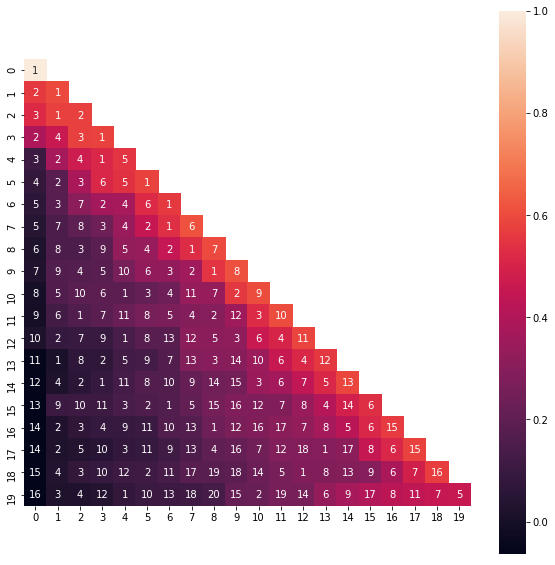

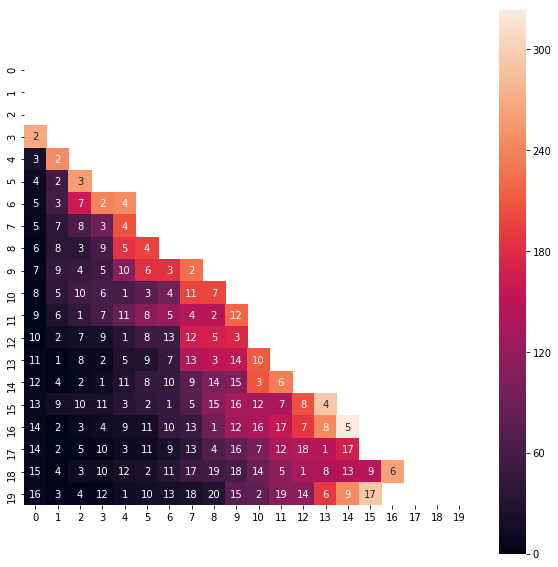

In [54]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_mat, annot=annot_mat, square=True)

p_plot = -1*np.log10(p_mat)
p_plot[~np.isfinite(p_plot)] = np.nan
plt.figure(figsize=(10,10))
sns.heatmap(p_plot, annot=annot_mat, square=True)

In [64]:
tvec = np.zeros(100)
tvec = np.array([s+1 if c%2 == 0 else s for c, s in enumerate(tvec)])
tvec = np.array([s+1 if c%2 == 0 else s for c, s in enumerate(tvec)])

for nn in range(1,10):
    print(pearsonr(tvec, tvec*nn))

(1.0, 0.0)
(1.0, 0.0)
(1.0, 0.0)
(1.0, 0.0)
(1.0, 0.0)
(1.0, 0.0)
(1.0, 0.0)
(1.0, 0.0)
(1.0, 0.0)
